In [127]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("Indian_Kids_Screen_Time.csv")

# Standardize column names 
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("-", "_").str.lower()
df.head()


,age,gender,avg_daily_screen_time_hr,primary_device,exceeded_recommended_limit,educational_to_recreational_ratio,health_impacts,urban_or_rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [133]:
# Check missing values before cross check
print("Missing values per column:\n", df.isnull().sum())

# 
# - For numeric columns - fill with median
# - For categorical columns - fill with mode
# Handle missing values column by column
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        # Fill numeric columns with their median
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
    else:
        # Fill categorical/text columns with their mode 
        mode_val = df[col].mode()[0] if not df[col].mode().empty else "Unknown"
        df[col].fillna(mode_val, inplace=True)

print("✅ Missing values handled successfully!")
# Confirm all filled missing values
print("\nMissing after filling:\n", df.isnull().sum())


Missing values per column:
 age                                     0
gender                                  0
avg_daily_screen_time_hr                0
primary_device                          0
exceeded_recommended_limit              0
educational_to_recreational_ratio       0
health_impacts                       3218
urban_or_rural                          0
dtype: int64
✅ Missing values handled successfully!

Missing after filling:
 age                                  0
gender                               0
avg_daily_screen_time_hr             0
primary_device                       0
exceeded_recommended_limit           0
educational_to_recreational_ratio    0
health_impacts                       0
urban_or_rural                       0
dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_12260\1151389541.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_12260\1151389541.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

In [88]:
# Standardize text columns to lowercase 
cat_cols = ['gender', 'primary_device', 'exceeded_recommended_limit',
            'health_impacts', 'urban_or_rural']

for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

#  unify gender and device values
df['gender'] = df['gender'].replace({'m': 'male', 'f': 'female'})
df['primary_device'] = df['primary_device'].replace({'mobile phone': 'mobile', 
                                                     'cellphone': 'mobile',
                                                     'tv ': 'tv'})


In [123]:
print(df['age'].unique())
sorted_ages = sorted(df['age'].unique())
print(sorted_ages)

[14 11 18 15 12 17 10 13  9  8 16]
[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


In [90]:
bins = [0, 3, 7, 11, 15, 18]
labels = ['0–3', '4–7', '8–11', '12–15', '16–18']
df['age_band'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)


In [92]:
bins = [0, 3, 7, 12, 18]
labels = ['Toddler', 'Child', 'Pre-Teen', 'Teen']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)


In [94]:
device_counts = df['primary_device'].value_counts(normalize=True) * 100
df['device_usage_share'] = df['primary_device'].map(device_counts)


In [96]:
summary = {
    "Total Rows": df.shape[0],
    "Total Columns": df.shape[1],
    "New Features Added": ["Age_Band", "Device_Usage_Share"],
    "Missing Values (After Cleaning)": int(df.isnull().sum().sum())
}

print("🧾 Preprocessing Summary:")
for key, val in summary.items():
    print(f"{key}: {val}")


🧾 Preprocessing Summary:
Total Rows: 9712
Total Columns: 11
New Features Added: ['Age_Band', 'Device_Usage_Share']
Missing Values (After Cleaning): 0


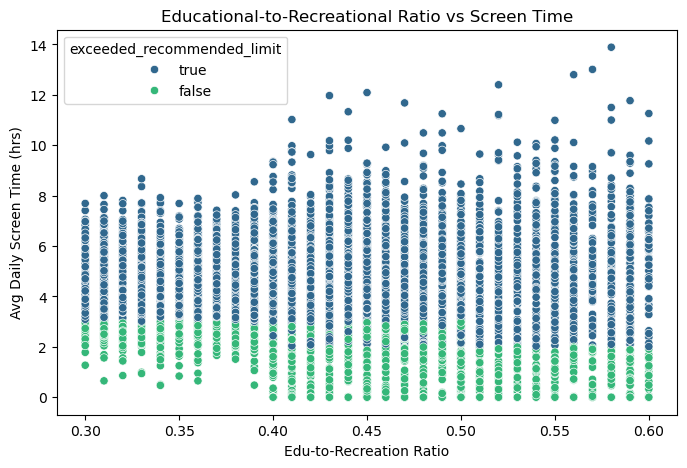

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.figure(figsize=(8,5))
sns.scatterplot(x='educational_to_recreational_ratio', y='avg_daily_screen_time_hr', 
                hue='exceeded_recommended_limit', data=df, palette='viridis')
plt.title("Educational-to-Recreational Ratio vs Screen Time")
plt.xlabel("Edu-to-Recreation Ratio")
plt.ylabel("Avg Daily Screen Time (hrs)")
plt.show()


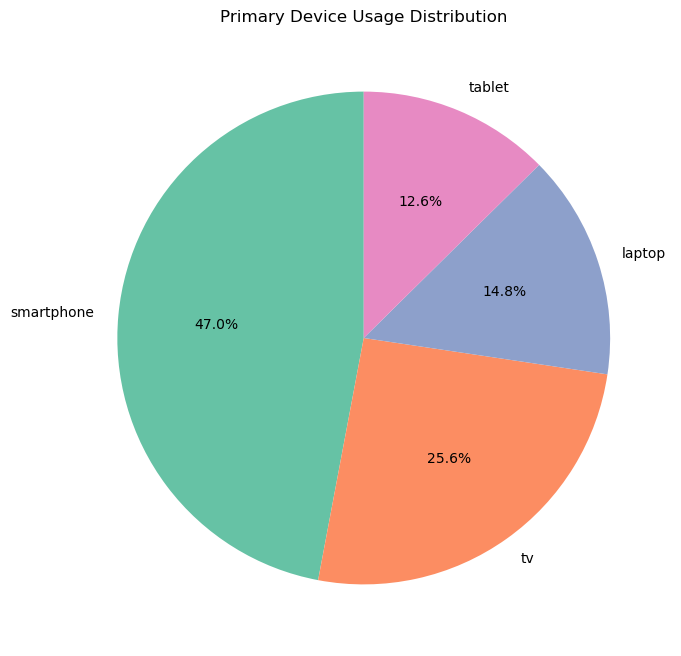

In [99]:
# Plot device usage distribution
plt.figure(figsize=(8, 8))
df['primary_device'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Primary Device Usage Distribution')
plt.ylabel('')
plt.show()

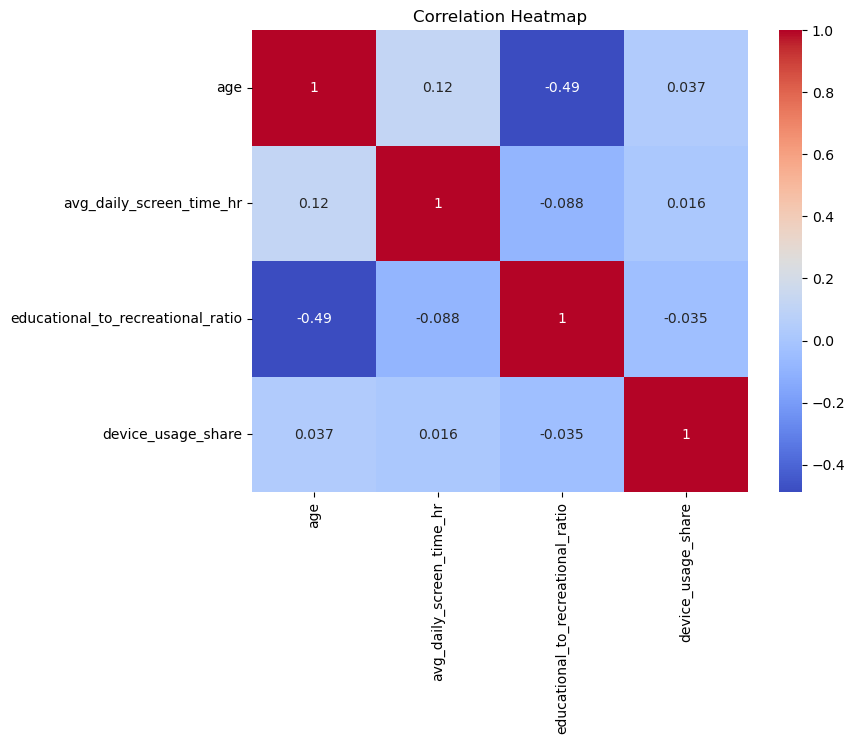

In [101]:
# Correlation Heatmap (only for numeric columns)
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_12260\2734518333.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index, y=age_counts.values, palette="viridis")


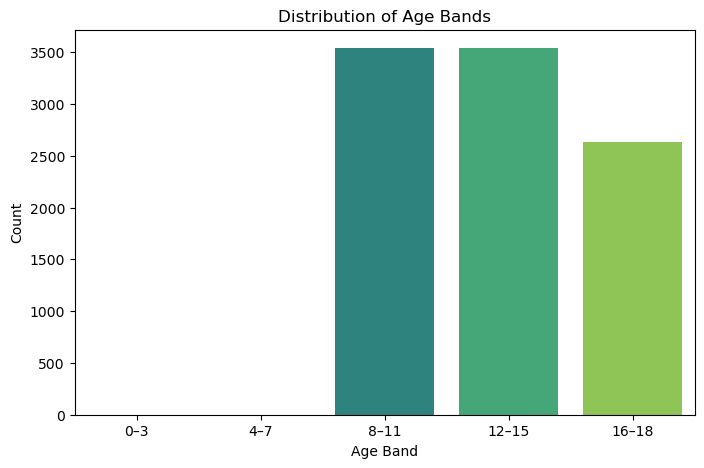

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame (replace with your df)
# df = pd.DataFrame({'Age': [2, 5, 8, 12, 16, 7, 14, 3, 18]})

bins = [0, 3, 7, 11, 15, 18]
labels = ['0–3', '4–7', '8–11', '12–15', '16–18']
df['age_band'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)

# Count the number of occurrences in each age band
age_counts = df['age_band'].value_counts().sort_index()

# Plot using Seaborn
plt.figure(figsize=(8,5))
sns.barplot(x=age_counts.index, y=age_counts.values, palette="viridis")
plt.xlabel('Age Band')
plt.ylabel('Count')
plt.title('Distribution of Age Bands')
plt.show()


In [108]:
# Createi binary health issue flag
df['has_health_issue'] = np.where(df['health_impacts'] != 'none', 1, 0)


In [110]:
df['screen_time_zscore'] = (df['avg_daily_screen_time_hr'] - df['avg_daily_screen_time_hr'].mean()) / df['avg_daily_screen_time_hr'].std()


C:\Users\hp\AppData\Local\Temp\ipykernel_12260\759942129.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age', data=df, palette='mako')


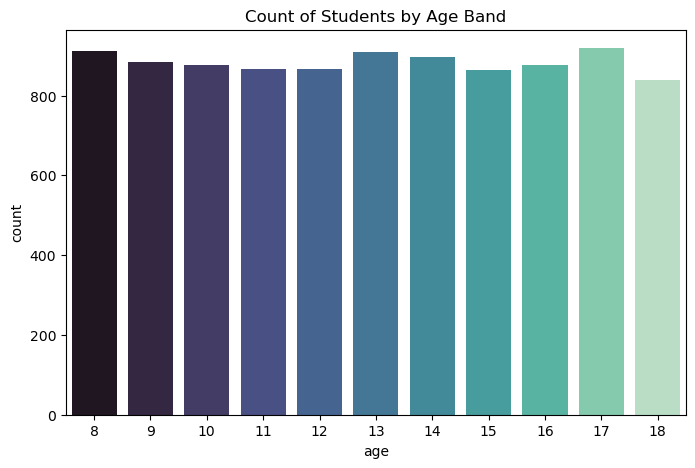

In [112]:
plt.figure(figsize=(8,5))
sns.countplot(x='age', data=df, palette='mako')
plt.title("Count of Students by Age Band")
plt.show()




C:\Users\hp\AppData\Local\Temp\ipykernel_12260\1583716103.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age', y='avg_daily_screen_time_hr', data=df, palette='viridis')


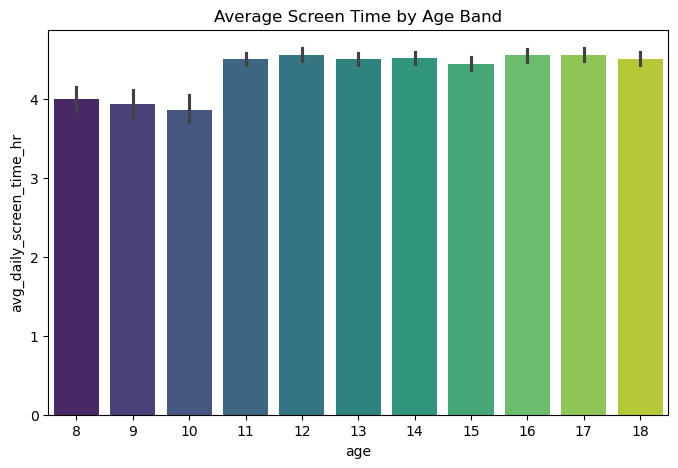

In [114]:
plt.figure(figsize=(8,5))
sns.barplot(x='age', y='avg_daily_screen_time_hr', data=df, palette='viridis')
plt.title("Average Screen Time by Age Band")
plt.show()


In [116]:
feature_descriptions = {
    'age': 'Age of the child (years)',
    'gender': 'Gender of the child (male/female)',
    'avg_daily_screen_time_hr': 'Average screen time (hours per day)',
    'primary_device': 'Most used device for screen usage',
    'exceeded_recommended_limit': '1 if exceeded WHO screen time limit, else 0',
    'educational_to_recreational_ratio': 'Ratio of educational to recreational screen use',
    'health_impacts': 'Reported health issues (e.g., eye strain, headache)',
    'urban_or_rural': '1 for urban residence, 0 for rural',
    'age_band': 'Categorized age ranges (0–3, 4–7, 8–11, 12–15, 16–18)',
    'has_health_issue': '1 if any health issue, 0 otherwise',
    'screen_time_zscore': 'Normalized screen time (Z-score)'
}

feature_dict = pd.DataFrame(feature_descriptions.items(), columns=['Feature', 'Description'])
feature_dict.to_csv("Feature_Dictionary.csv", index=False)
print("Feature dictionary created successfully.")


Feature dictionary created successfully.


In [118]:
df.to_csv("Indian_Kids_Screen_Time_Cleaned.csv", index=False)
print(" Cleaned and engineered dataset saved successfully!")


 Cleaned and engineered dataset saved successfully!


In [120]:
summary = {
    "Total Rows": df.shape[0],
    "Total Columns": df.shape[1],
    "Features Created": ['age_band', 'has_health_issue', 'screen_time_zscore'],
    "Missing Values Remaining": int(df.isnull().sum().sum())
}

print(" Preprocessing Summary:")
for k, v in summary.items():
    print(f"{k}: {v}")


 Preprocessing Summary:
Total Rows: 9712
Total Columns: 13
Features Created: ['age_band', 'has_health_issue', 'screen_time_zscore']
Missing Values Remaining: 0
